# First-Order Linear Systems

This notebook covers the following topics:

* Review the mathematics of first-order linear differential equations.
* Define time-constant and steady-state gain for input/output systems.
* Describe **standard representations** for first order systems including **state-space** and **gain/time-constant**.

**Learning Goals**

After completing this notebook, a student will be able to manipulate first-order models to

1. Identify inputs and output variables, and model parameters.
2. Identify units of inputs, outputs, and parameters.
3. Change units.
4. Compute steady-state gain and time constant.
5. Convert first order models to different standard representations.
6. Visually estimate steady-state gain and time constant from inspection of step response data.
7. Quantitatively fit a first order model to step response data and evaluate the quality of the fit.



## State-Space

The time-varying **input** $u(t)$ is a time-varying **input** causing changes in the state $x$. The differential equation

$$\frac{dx}{dt} = ax + bu(t)$$

models the cause-and-effect relationship between $u(t)$ and $x(t)$. $a$ and $b$ are constant coefficients.  Given an **initial condition** $x(t_0)$ and the input $u(t)$ starting at $t_0$, solution of this differential equation gives the value of $x(t)$ at all later times $t > t_0$.

We will refer to this form as the **state-space model**. A state space model will always isolate the first order derivatives on the left-hand side of the equation a coefficient of one.

:::{admonition} Example: Bank account.

Consider a bank account with balance $W$, savings rate $s(t)$, and interest rate $r$. 

$$\frac{dW}{dt} = r W + s(t)$$

1. What are typical values and units of $r$?
2. What are the units of $t$? 
3. Comparing to the state-space model, what are the values of $a$ and $b$?

:::

:::{admonition} Example: A cooling cup of coffee.

Consider a cup of coffee of volume $V$, mass specific heat transfer coefficient $C_p$, heat transfer coefficient $U$, area $A$, and ambient temperature $T_{amb}$.

$$\rho V C_p \frac{dT}{dt} = UA(T_{amb} - T)$$

Rewrite this in the standard form. What are $a$ and $b$?

:::

:::{admonition} Exercise

The differential equation describing the pharmacokinetic model of the last section was given by 

$$\frac{dC}{dt} = \frac{1}{V}u(t) - \frac{Q}{V}C$$

Review the definitions of $C(t)$, $V$, $Q$, and $u(t)$ and complete the following table

| Generic model | Pharmacokinetic model | Description
| :--: | :--: | :--
| $x = $ | | 
| $u(t) = $ | | 
| $a = $ | | 
| $b = $ | |

:::

## Input/Output Systems

A generic model for a first-order linear system with one state $x$ and and input $u(t)$ can be represented by a block diagram

$$u(t) \longrightarrow \fbox{$\frac{dx}{dt} = ax + bu$} \longrightarrow x(t)$$


The **steady-state** of a system refers to a constant value of the state variable achieved when the input is set to at a constant value $\bar{u}$. The steady-state is defined by 

$$\bar{x} = \lim_{t\rightarrow\infty} x(t)$$

The state is steady if the state variable is not changing, i.e.,  

$$\frac{d\bar{x}}{dt} = 0$$

which provides an equation to define the relationship between the steady input and the steady state. When applied to our model of a first-order linear system,

$$0 = a \bar{x} + b \bar{u} \implies \bar{x} = -\frac{b}{a}\bar{u}$$

The value $-\frac{b}{a}$ is called the **gain** which is a coefficient describing the value of the steady state $\bar{x}$ as a multiple of the steady input $\bar{u}$.

$$\bar{x} = K \bar{u} \qquad\text{where}\qquad K = -\frac{b}{a}$$

$K$ will have units for most process applications. For example, if $x$ denotes concentration of a chemical species in mg/liter and $u$ denotes a input flow in units of mg/hour, the units of $K$ are hours/liter. 


:::{admonition} Example

Suppose the speed of a car, $x$, in response to a throttle position $u$ has been found to satisfy the equation

$$\frac{dx}{dt} = - 0.12 x + 0.096 u$$

The units of $t$ are seconds, speed is measured in miles per hour, and throttle position in percent of full scale. 

* a. What are the units of $x$ and $u$?
* b. What are the units of the $a$ and $b$ coeffients?
* c. What is value and units of the steady-state gain? 
* d. What is the maximum speed of the car?
* e. Rewrite the state space equation using metric units of km/hour.

Work out the answers before attempting any simulations.

:::

Text(60, 32.0, 'K = 0.80 mph/% throttle')

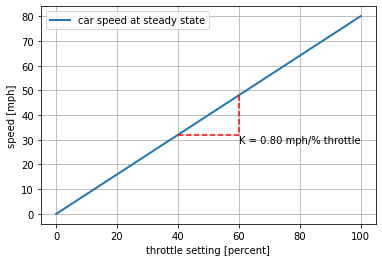

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
b = 0.096
K = -b/a

# compute state response
u_ss = np.linspace(0, 100)
x_ss = K*u_ss

# plot steady-state response
fig, ax = plt.subplots(1, 1)
ax.plot(u_ss, x_ss, label="car speed at steady state", lw=2)
ax.set_xlabel("throttle setting [percent]")
ax.set_ylabel("speed [mph]")
ax.legend()
ax.grid(True)

# add annotations
ua = 40
ub = 60
ax.plot([ua, ub, ub], [K*ua, K*ua, K*ub], "r--", 2)
ax.text(ub, K*ua, f"K = {K:4.2f} mph/% throttle", va="top")

## Be careful with units!

In electrical engineering circuit analysis, $x$ and $u$ typically refer to electrical potential measured in volts, or current measured in amperes. In these cases gain $K$ will be dimensionless. Because of this, the issue of whether or not the gain has units can be a source of misunderstanding among engineering disciplines with potentially serious consequences. Therefore, for control applications, it is essential to carefully document units, especially when working in cross-disciplinary teams.

***For this course, values of gain $K$ should always specify units.***

## Dynamic Response

The solution to a constant-coefficient, first-order linear differential equation with input $u(t)$

$$\frac{dx}{dt} = a x + b u$$

with initial condition $x(t_0)$ is given by 

$$ x(t) = e^{a (t - t_0)}x(t_0) + \int_{t_0}^t e^{a(t-t')} b u(t') dt'$$

The dynamic response of a scalar first order system is the superposition of two parts, a response to an initial condition plus a response to a non-zero input. 

Let's consider each of these separately.

### Response to an Initial Condition

For the case when $u(t) = 0$, the scalar first order system becomes

$$\frac{dx}{dt} = ax$$

If the value $x_0 = x(t_0)$ is known at $t_0$, then the solution to this differential equation is

$$x(t) = x_0 e^{a(t - t_0)}$$

There are three important cases:

* $a < 0$: **exponential decay** to zero.
* $a = 0$: x(t) **constant** with a value $x(t_0)$
* $a > 0$: **exponential increase** to either $+\infty$ or $-\infty$, depending on the sign of $a$.

:::{admonition} Example (cont.)

Let's continue with the example of the car. Suppose you are driving at a steady speed of 60 mph then take your foot off the throttle at $t = 20$ seconds.

* a. What was the initial throttle setting before 20 seconds?
* b. What is the throttle setting after 20 seconds?
* c. For the purposes for determining the response after 20 seconds, what is the initial condition?
* d. Is the response exponentially decaying, constant, or exponentially increasing?

:::

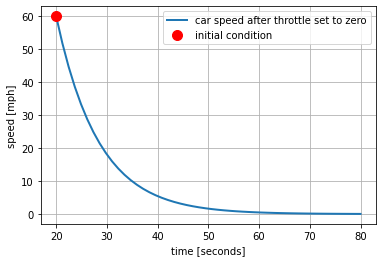

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(a*(t-t0))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.legend()
ax.grid(True)

## Time constant

The system parameter $a$ has units of inverse time. There is a **characteristic time constant** that can be defined as

$$\tau = -\frac{1}{a} \qquad\iff\qquad a = -\frac{1}{\tau}$$

With this definition, an alternative formulation of the model and response can be given by

$$\frac{dx}{dt} = -\frac{1}{\tau}x \implies x(t) = x(t_0) e^{-\frac{(t-t_0)}{\tau}}$$

:::{admonition} Example (cont.)

For the car example, what is the value of the time constant?

:::

Knowledge of the time constant provides a simple means of sketching the response of first order linear system subject to a a sudden change. 

Normalize the response as

$$
\begin{align}
z(t) & = 1 - \frac{x(t)}{x(t_0)} \\
& = 1 - e^{a(t-t_0)}
\end{align}
$$

The following table shows the response of a first order system as a fraction of the initial condition.

| $t$ |  $\frac{x(t)}{x_0}$ | $z$ = 1 - $\frac{x(t)}{x_0}$ |
| :---: | :---: | :---: |
| $t_0$ | 1.000 | 0.000 |
| $t_0 + \tau$ | 0.368 | 0.632 |
| $t_0 + 2\tau$ | 0.135 | 0.865 |
| $t_0 + 3\tau$ | 0.050 | 0.950 |
| $t_0 + 4\tau$ | 0.018 | 0.982 |

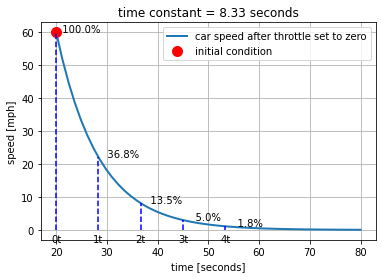

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
tau = -1.0/a

t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau)

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.set_title(f"time constant = {tau:4.2f} seconds")
ax.legend()
for  k in range(0, 5):
    ax.plot([t0 + k*tau, t0 + k*tau], [0, x0*np.exp(-k)], "b--")
    ax.text(t0 + k*tau, -0.02*x0, f"{k}t", va="top", ha="center")
    ax.text(t0 + k*tau, x0*np.exp(-(k*tau)/tau), f"  {100*np.exp(-k):5.1f}%")
ax.grid(True)

### Half-life

The characteristic time constant $\tau$ defined above has a natural relationship with the parameters appearing in the problem statement and model. That time constant is equal to time $t - t_0 = \tau$ necessary for the response to decay to a fraction $e^{-\frac{(t-t_0)}{\tau}} = e^{-1} = 1/e = 0.368$ of the starting value. 

Another commonly used benchmark is to define a period of time necessary for the response to decay to 1/2 of the starting value.  This is called the **half-life**, or $\tau_{1/2}$. To find the relationship to $\tau$, w

$$ 0.5 = e^{-\frac{\tau_{1/2}}{\tau}} \implies \tau_{1/2} = - \tau \ln(0.5)$$

or 

$$\tau_{1/2} = 0.693\tau$$

The half-life is an easy benchmark to identify from a sketch of experimental data.

:::{admonition} Example (cont.)

What is $\tau_{1/2}$ for the car example?  Use $\tau_{1/2}$ to sketch the speed of the car as a function of time given an initial condition of 60 mph and $u(t) = 0$.

:::

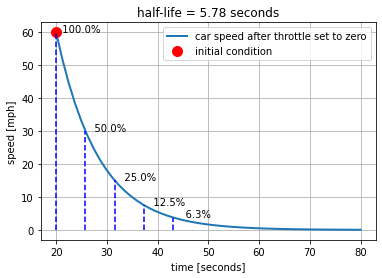

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
tau = -1.0/a
tau_half = 0.693*tau

t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau)

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.set_title(f"half-life = {tau_half:4.2f} seconds")
ax.legend()
for k in range(0, 5):
    ax.plot([t0 + k*tau_half, t0 + k*tau_half], [0, x0*np.exp(-k*tau_half/tau)], "b--")
    ax.text(t0 + k*tau_half, x0*np.exp(-(k*tau_half)/tau), f"  {100*np.exp(-k*tau_half/tau):5.1f}%")
ax.grid(True)


:::{admonition} Example (cont.)

**Example:** The following cell simulates an experimental measurement of the response of car. From this data, estimate:

* a. The half-life $\tau_{1/2}$
* b. The characteristic time constant $\tau$.
* c. The parameter $a$ for the model $\frac{dx}{dt} = ax$

:::

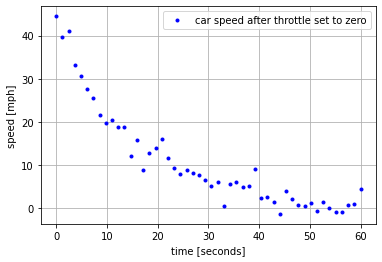

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -np.random.uniform(0.05, 0.20)

t0 = 0.0
x0 = np.random.uniform(40, 80)

tau = -1.0/a

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau) + 2.0*np.random.normal(size=len(t))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'b.', label="car speed after throttle set to zero")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.legend()
ax.grid(True)

### Step Inputs

The **Heaviside step function** is a function of time that changes discontinuously from 0 to 1 at $t=0$. The `numpy` library provides a useful implementation that is demonstrated in the following cell.

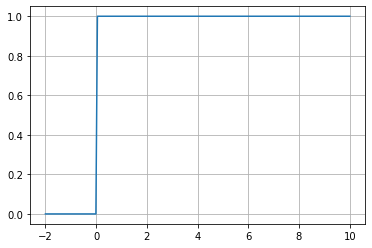

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2, 10, 200)
u = np.heaviside(t, 0.5)

fig, ax = plt.subplots(1, 1)
ax.plot(t, u)
ax.grid(True)

This function is easily adapted to create a step function of arbitrary size, offset, and location in time.

:::{admonition} Example (cont.)

**Example:** Create a step input for the car throttle corresponding to change from 25% throttle to 75% throttle at $t = 20$ seconds.

:::

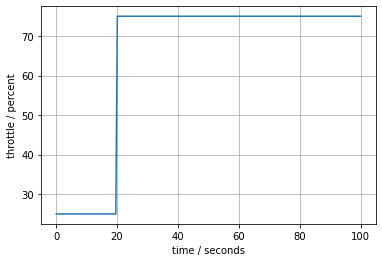

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t0 = 20.0
ua = 25.0
ub = 75.0

t = np.linspace(0, 100, 200)
u = ua + (ub - ua)*np.heaviside(t - t0, 0.5)

fig, ax = plt.subplots(1, 1)
ax.plot(t, u)
ax.set_xlabel("time / seconds")
ax.set_ylabel("throttle / percent")
ax.grid(True)

## Response to a step input

Now let's consider the response of a linear first order system

$$\frac{dx}{dt} = a x + b u$$

to a time-varying input $u(t)$ given an initial value $x_0$ known at time 0. The general solution to our equation is

$$x(t) = x_0 e^{at} + \int_{0}^t e^{a(t - t')} b u(t') dt'$$

where $t'$ is the variable on integration. 

If $u(t) = U$ is constant for $t \geq 0$, then

$$x(t) = x_0 e^{at} - \frac{b}{a} U \left[1 - e^{a t}\right]$$

Translating in time to $t_0$, for any $t > t_0$

$$x(t) = x_0 e^{a(t-t_0)} - \frac{b}{a} U \left[1 - e^{a (t-t_0)}\right]$$

If $a < 0$ then in the steady-state limit $t\rightarrow\infty$ the term involving $e^{a(t-t_0)} \rightarrow 0$. This leaves

$$\lim_{t\rightarrow\infty} x(t) = -\frac{b}{a} U$$

Earlier we defined the **gain** of a first-order linear systems as $K = -\frac{b}{a}$ which gives us

$$\lim_{t\rightarrow\infty} x(t) = K U $$

as you might expect from the definition of gain and step inputs.

:::{admonition} Example (cont.)

Continuing the car example, consider a step input to the throttle position of 75%. First, sketch the expected response of the car speed. What is the half-life, and what is the car speed at that point? What is the car speed at 1, 2, and 3 time constants?  What is the steady-state car speed?

After doing a manual sketch, write a Python code to produce a plot of the car speed as a result of step change in throttle position.

:::

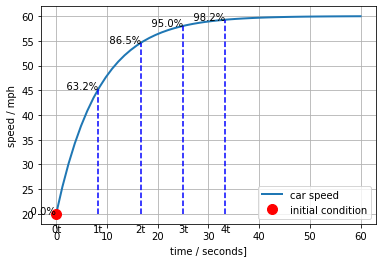

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
b = 0.096
U = 75.0

t0 = 0.0
x0 = 20.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time / seconds]")
ax.set_ylabel("speed / mph")
ax.legend()
tau = -1/a
for  k in range(0, 5):
    t = t0 + k*tau
    x = x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))
    ax.plot([t, t], [x0, x], "b--")
    ax.text(t, x0-2, f"{k}t", va="top", ha="center")
    ax.text(t, x, f"  {100*(1-np.exp(-k)):5.1f}%", ha="right")
ax.grid(True)

## Gain, time-constant form for a first-order linear system

We started with a scalar, linear first-order system in the form

$$\fbox{$\frac{dx}{dt} = a x + b u$}$$

We found two key parameters that describe the behavior of this systems in terms that can be easily indentified from a plot of the step response, the time constant $\tau$ and gain $K$.

$$\begin{align*}
\tau & = -1/a \\
K & = - \frac{b}{a}
\end{align*}$$

Obviously, once $K$ and $tau$ are estimated, values for $a$ and $b$ are easily computed. But sometimes it is more transparent simply to write the linear system using $K$ and $\tau$ directly, as

$$\fbox{$\tau\frac{dx}{dt} = -x + K u$}$$

What is useful about this form is that the gain and time constant are immediately known from coefficients in the model.

## Exercises

:::{admonition} Exercise 1

An experiment is performed in which a car is run at constant speed on a test track, and the throttle setting is suddenly changed to zero. The recorded speed is shown in the following plot. From this plot, what is the intial condition? What is the first order time constant?

![](figures/exercise_time_constant.png)

:::

:::{admonition} Exercise 2

A recent paper demonstrated the use of engineered proteins to create a luminescent biosensor for the detection of the COVID-19 virus. The step response of the biosensor is shown in the chart at the center of this figure.

![](figures/Yeh2021_biosensor.png)

Assume a first-order model would be used to describe the dynamics. What is the corresponding time constant? How much time should be allowed for the meaasurement to reach 95% of the steady-state response?

:::

:::{admonition} Exercise 3

For the same biosensor data, assume the step input of virus has arbitrary units $U = 10000$. For a model in the form

$$\frac{dx}{dt} = a x + b u$$

what the values of $a$ and $b$?

:::

:::{admonition} Exercise 4

Again for the same biosensor data and $U = 10000$, what are the values $K$ and $\tau$ for a model written in the form

$$\tau\frac{dx}{dt} = - x + K u$$

:::

:::{admonition} Exercise 5

Prepare a simulation of the model you have created for the biosensor.

:::


Despite the apparent simplicity, a first-order linear model captures several essential and important characteristics of the relationship between inputs and states such as **time-constant** and **gain**. These concepts are critical to your understanding of process control.